# 3-SAT Problem Using Grover Search Algorithm
# 1. Kush Vasani - 202003012
# 2. Jainil Patel - 202003027
# 3. Pratap Ratiya - 202003036

In [93]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit import ClassicalRegister, QuantumRegister
import numpy as np
from qiskit.circuit import Gate
from qiskit.circuit.library.phase_oracle import PhaseOracle
# The following example encodes the clause (x1 OR x2 OR ~x3) AND (~x1 OR ~x2 OR x3)
clause = [[1, 2,-3], [-1, -2,-3]]

num_qubits = 3

qc = QuantumCircuit(6,3)

qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.initialize([1,0],2)
qc.initialize([1,0],3)
qc.initialize([1,0],4)
qc.initialize([1, -1]/np.sqrt(2), 5)

qc.h(list(range(num_qubits)))

def oracle(qc, clause):
    i=3
    qc.x(0)
    qc.x(1)
    qc.x(2)
    for literals in clause:
        for l in literals:
            if(l<0):
                qc.x(abs(l)-1)
        qc.mct([0,1,2],i)
        i=i+1
        for l in literals:
            if(l<0):
                qc.x(abs(l)-1)
    qc.cx(3,5)
    qc.cx(4,5)
    qc.mct([3,4],5)
    
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits):
        qc.h(qubit)
    for qubit in range(nqubits):
        qc.x(qubit)
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    for qubit in range(nqubits):
        qc.x(qubit)
    for qubit in range(nqubits):
        qc.h(qubit)
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

num_iterations = 1
for i in range(num_iterations):
    oracle(qc,clause)
    qc.append(diffuser(3), [0,1,2])

qc.draw()

┌─────────────────┐       ┌───┐┌───┐          ┌───┐          ┌───┐»
q_0: ──────┤ Initialize(1,0) ├───────┤ H ├┤ X ├───────■──┤ X ├───────■──┤ X ├»
           ├─────────────────┤       ├───┤├───┤       │  ├───┤       │  ├───┤»
q_1: ──────┤ Initialize(1,0) ├───────┤ H ├┤ X ├───────■──┤ X ├───────■──┤ X ├»
           ├─────────────────┤       ├───┤├───┤┌───┐  │  ├───┤┌───┐  │  ├───┤»
q_2: ──────┤ Initialize(1,0) ├───────┤ H ├┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├»
           ├─────────────────┤       └───┘└───┘└───┘┌─┴─┐└───┘└───┘  │  └───┘»
q_3: ──────┤ Initialize(1,0) ├──────────────────────┤ X ├──■─────────┼───────»
           ├─────────────────┤                      └───┘  │       ┌─┴─┐     »
q_4: ──────┤ Initialize(1,0) ├─────────────────────────────┼───────┤ X ├──■──»
     ┌─────┴─────────────────┴──────┐                    ┌─┴─┐     └───┘┌─┴─┐»
q_5: ┤ Initialize(0.70711,-0.70711) ├────────────────────┤ X ├──────────┤ X ├»
     └──────────────────────────────┘                    └───┘          └───┘»
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌────────┐
«q_0: ┤0       ├
«     │        │
«q_1: ┤1 U$_s$ ├
«     │        │
«q_2: ┤2       ├
«     └────────┘
«q_3: ────■─────
«         │     
«q_4: ────■─────
«       ┌─┴─┐   
«q_5: ──┤ X ├───
«       └───┘   
«c: 3/══════════
«

Satisfying assignment found with probability: 0.1838
Measurement results: {'001': 456, '010': 464, '111': 495, '000': 3646, '011': 3596, '101': 443, '110': 456, '100': 444}


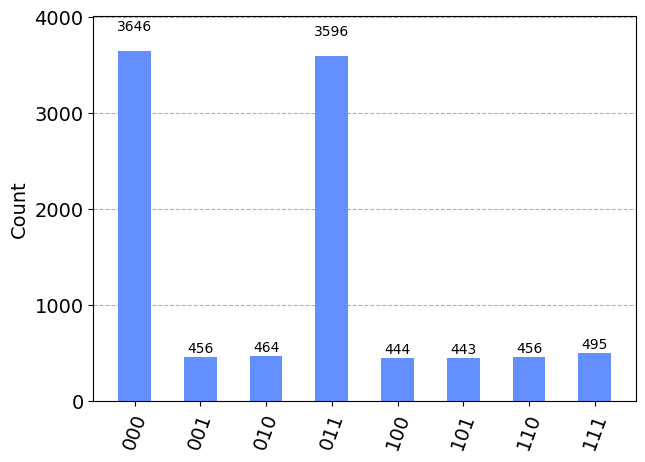

In [94]:
qc.measure([0,1,2],[0,1,2])

backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=10000).result()

counts = result.get_counts()
p_success = sum([counts[k] for k in counts.keys() if k.startswith('1')])/sum(counts.values())

print("Satisfying assignment found with probability:", p_success)
print("Measurement results:", counts)
from qiskit.tools.visualization import plot_histogram


display(plot_histogram(counts))